Radial Basis Functions Network
===

* 41:42 min | Última modificación: Mayo 31, 2021 | [YouTube]

In [1]:
import warnings

warnings.filterwarnings("ignore")

## Definición

$$
y = \sum_h w_h \exp( -\beta || \mathbf{x} - \mathbf{c} || ) 
$$

## Caso de aplicación

In [2]:
import pandas as pd

df = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/iris.csv",
    sep=",",  
    thousands=None,
    decimal=".",
)  

df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Preparación de los datos

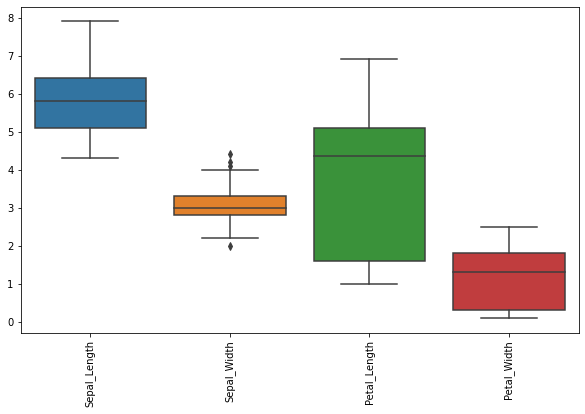

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

#
# Los rangos de las variables numéricas son
# bastantes diferentes
#
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90);

In [4]:
X_train = df.copy()
y_train_true = X_train.pop("Species")

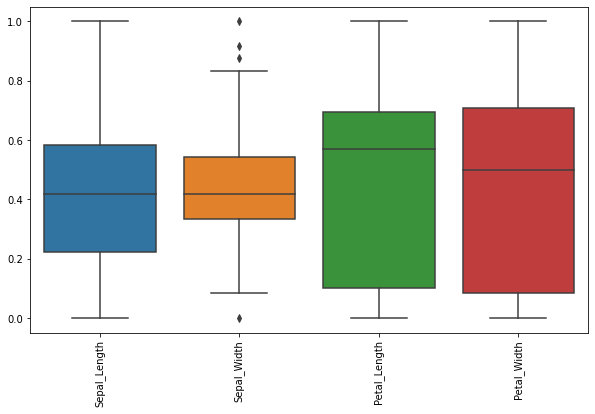

In [5]:
from sklearn.preprocessing import MinMaxScaler

#
#  Se escalan todas las variables al rango [0, 1]
#  para evitar problemas asociados a la escala
#
scaler = MinMaxScaler()
X_train_norm = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train_norm)
plt.xticks(rotation=90);

In [6]:
y_train_true = y_train_true.map(lambda w: {'setosa': 0, 'virginica': 1, 'versicolor': 2}[w])
y_train_true.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [7]:
y_train_true.tail()

145    1
146    1
147    1
148    1
149    1
Name: Species, dtype: int64

## Modelo

In [14]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices(
    (X_train_norm.values, y_train_true.values)
).batch(1)

for feat, targ in dataset_train.take(5):
    print ('Features: {}, Target: {}'.format(feat, targ))

Features: [[0.22222222 0.625      0.06779661 0.04166667]], Target: [0]
Features: [[0.16666667 0.41666667 0.06779661 0.04166667]], Target: [0]
Features: [[0.11111111 0.5        0.05084746 0.04166667]], Target: [0]
Features: [[0.08333333 0.45833333 0.08474576 0.04166667]], Target: [0]
Features: [[0.19444444 0.66666667 0.06779661 0.04166667]], Target: [0]


## Modelo general

In [15]:
from tensorflow.keras import backend as K

class RBFLayer(tf.keras.layers.Layer):
    def __init__(self, units, gamma, name="rbf_layer", **kwargs):
        super(RBFLayer, self).__init__(name=name, **kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        self.mu = self.add_weight(
            name="mu",
            shape=(int(input_shape[1]), self.units),
            initializer="uniform",
            trainable=True,
        )
        super(RBFLayer, self).build(input_shape)
        
    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        out = K.exp(-1 * self.gamma * l2)
        return out
    
    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [16]:
def create_and_evaluate(h):
    model = tf.keras.Sequential()
    model.add(RBFLayer(units=h, gamma=0.5))
    model.add(tf.keras.layers.Dense(1, use_bias=False))
    model.compile(optimizer="adam", loss="mean_squared_error")
    model.fit(dataset_train, epochs=20, verbose=0)
    return model.evaluate(dataset_train, verbose=0)

## Modelos

In [17]:
#
# Diccionario para guardar los resultados para cada modelo
#
results = {}

In [22]:
for h in range(1, 10):
    results["H={}".format(h)] = create_and_evaluate(h)

## Resultados

In [23]:
results

{'H=1': 1.6832853555679321,
 'H=2': 0.3467676639556885,
 'H=3': 0.26804354786872864,
 'H=4': 0.2315817028284073,
 'H=5': 0.21333031356334686,
 'H=6': 0.19825662672519684,
 'H=7': 0.19077588617801666,
 'H=8': 0.18663306534290314,
 'H=9': 0.20315112173557281}

In [25]:
H_OPT = 6

model = tf.keras.Sequential()
model.add(RBFLayer(units=H_OPT, gamma=0.5))
model.add(tf.keras.layers.Dense(1, use_bias=False))
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(dataset_train, epochs=20, verbose=0)
y = model.predict(dataset_train)
y[0:50]

array([[0.36490247],
       [0.5416397 ],
       [0.4101744 ],
       [0.46956468],
       [0.31039423],
       [0.3529658 ],
       [0.36412373],
       [0.40808955],
       [0.4989843 ],
       [0.48163965],
       [0.34068406],
       [0.39472446],
       [0.4893034 ],
       [0.3533485 ],
       [0.22945747],
       [0.17569327],
       [0.29312208],
       [0.39824784],
       [0.398292  ],
       [0.29319602],
       [0.4966484 ],
       [0.36447194],
       [0.18689519],
       [0.5991758 ],
       [0.44414243],
       [0.59248173],
       [0.49215147],
       [0.39530736],
       [0.41997868],
       [0.46185023],
       [0.51952124],
       [0.5302744 ],
       [0.13490608],
       [0.15283683],
       [0.51784074],
       [0.4392444 ],
       [0.40217784],
       [0.26273298],
       [0.44128552],
       [0.4225855 ],
       [0.36739135],
       [0.7617327 ],
       [0.3611086 ],
       [0.51255715],
       [0.38537344],
       [0.56154084],
       [0.2770794 ],
       [0.411

In [26]:
y[50:100]

array([[1.2520281],
       [1.2770954],
       [1.3136126],
       [1.5642669],
       [1.4524027],
       [1.4282722],
       [1.2438893],
       [1.3350649],
       [1.3967894],
       [1.3887393],
       [1.496742 ],
       [1.3456142],
       [1.5804024],
       [1.4177132],
       [1.3033996],
       [1.3020864],
       [1.3491755],
       [1.4037266],
       [1.6599728],
       [1.4685122],
       [1.2882893],
       [1.4080244],
       [1.5813233],
       [1.4426916],
       [1.3867936],
       [1.3506563],
       [1.4390348],
       [1.3710345],
       [1.4110588],
       [1.3779731],
       [1.4865236],
       [1.4582429],
       [1.4185795],
       [1.515995 ],
       [1.3334241],
       [1.1839298],
       [1.3203231],
       [1.6164727],
       [1.3049514],
       [1.4960432],
       [1.4772413],
       [1.3690608],
       [1.4672167],
       [1.3850135],
       [1.4427402],
       [1.3074688],
       [1.3646413],
       [1.3884081],
       [1.3088975],
       [1.4001714]],

In [27]:
y[100:]

array([[1.1582882 ],
       [1.495252  ],
       [1.293475  ],
       [1.4291296 ],
       [1.3293347 ],
       [1.1983786 ],
       [1.4782385 ],
       [1.3262295 ],
       [1.5438913 ],
       [0.98280066],
       [1.2774997 ],
       [1.4930207 ],
       [1.3294759 ],
       [1.5476679 ],
       [1.3783247 ],
       [1.2415808 ],
       [1.3815963 ],
       [0.87981606],
       [1.2430836 ],
       [1.6776216 ],
       [1.2088957 ],
       [1.4341707 ],
       [1.2533792 ],
       [1.5005128 ],
       [1.213915  ],
       [1.2356519 ],
       [1.4616382 ],
       [1.3830364 ],
       [1.428434  ],
       [1.32867   ],
       [1.3437793 ],
       [0.88483125],
       [1.4112478 ],
       [1.4748714 ],
       [1.5549246 ],
       [1.1709994 ],
       [1.1436349 ],
       [1.3437726 ],
       [1.3790867 ],
       [1.2826219 ],
       [1.244713  ],
       [1.249951  ],
       [1.495252  ],
       [1.2131146 ],
       [1.1460897 ],
       [1.3041041 ],
       [1.562139  ],
       [1.362